
1. **Project Title**: Fasion Recognition

    **Project Author**: Joshua Kabwanga

2. **Libraries Used**: 
    - `os`
    - `cv2`
    - `numpy`
    - `tensorflow`
    - `matplotlib.pyplot`
3. **Data**:
    - The fasion dataset is used for training and testing the model to predict a fasion.
    - An external image (`Dress.png`) is used for prediction.
4. **Model**:
    - A neural network model is created using TensorFlow's Keras API.
    - The model consists of a flatten layer, two dense layers with ReLU activation, and an output layer with softmax activation.
    - The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss.
    - The model is trained for 10 epochs.


In [1]:
#!pip install tensorflow

import python libreries

In [2]:
#python libray
import os
import cv2 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
train_new_model = True

if train_new_model:
    fashion = tf.keras.datasets.fashion_mnist
    (X_train, y_train), (X_test, y_test) = fashion.load_data()

    #normalize the data

    X_train = tf.keras.utils.normalize(X_train, axis = 1)
    X_test = tf.keras.utils.normalize(X_test, axis = 1)

    #create a neural network model
    #let train the model

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation = tf.nn.softmax))

    #compile the model
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=(['accuracy']))

    #fit the model for training

    model.fit(X_train, y_train, epochs= 10)

    #Evaluate the model
    val_loss = model.evaluate(X_test,y_test)
    print(val_loss)

    #saving the model
    model.save('fasion model.keras')
else:
    #load the model
    model = tf.keras.models.load_model('fasion model.model')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7649 - loss: 0.6520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8668 - loss: 0.3631
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.3191
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8876 - loss: 0.2996
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.2785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9040 - loss: 0.2586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9051 - loss: 0.2457
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9096 - loss: 0.2376
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9153 - loss: 0.2231
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9178 - loss: 0.2137
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8871 - loss: 0.3275
[0.3283144533634186, 0.8873000144958496]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
The label number is probably 3


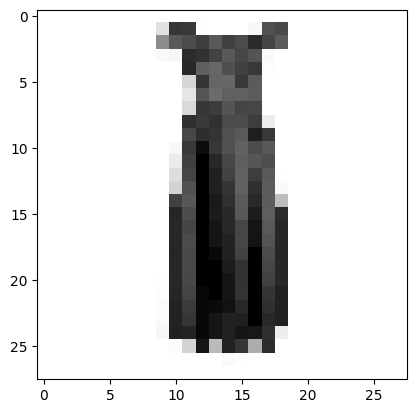

In [4]:
# Load an external image for prdiction
image_path = 'dress.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image to match the input shape of the model
img = cv2.resize(img, (28, 28))
img = np.invert(img)
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

# Use the model to predict the image
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f'The label number is probably {predicted_digit}')
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()

### Label description

![2025-01-09 21_18_59-Window.png](<attachment:2025-01-09 21_18_59-Window.png>)
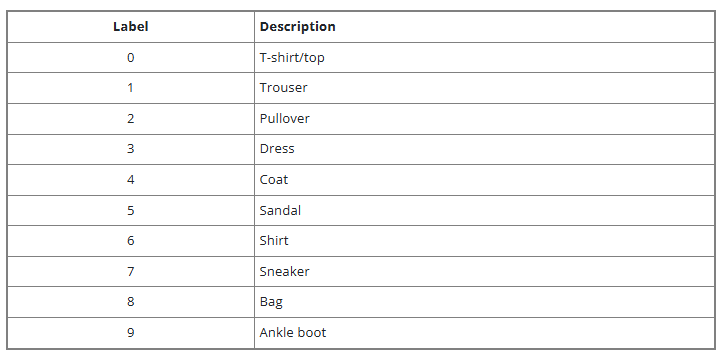